In [187]:
# Col1: Building unit type --- cancel
# Col5: Longitude --- cancel
# Col6: Latitude --- cancel
# Col8: Building Unit --- cancel

#################### 要用的 column ####################
# Col2: Building Location # 什麼大廈他大概的價錢範圍
# Col3: Building Estate
# Col4: District
# Col7: Building Floor


# Col9: Building Net Area
# Col10: Building Gross Area
# Col12: Price per net area
# Col13: Price per gross area


# Col11: Building Price hkd (Example: 787 -> 7.78 M hkd) 要轉換價格
# Col14: Transaction date
# Col15: % change from previous transaction (same unit)
# Col16: date of previous transaction
#
############################################################

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np





In [189]:
# load data 然後 save as df
data = "properties.csv"
df = pd.read_csv(data, encoding='utf-8')
df_backup = df.copy()

# Testing 用，不用理會
# print(df.head())
# print("="*100)
print(df.info())

/var/folders/_1/w3rmdmrx14qdr85c4l_crhq80000gn/T/ipykernel_86763/944955107.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data, encoding='utf-8')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262519 entries, 0 to 1262518
Data columns (total 16 columns):
 #   Column                                          Non-Null Count    Dtype  
---  ------                                          --------------    -----  
 0   Building unit type                              1262519 non-null  object 
 1   Building Location                               1262519 non-null  object 
 2   Building Estate                                 1262519 non-null  object 
 3   District                                        1262519 non-null  object 
 4   Longitude                                       1262519 non-null  float64
 5   Latitude                                        1262519 non-null  float64
 6   Building Floor                                  1262190 non-null  object 
 7   Building Unit                                   1260570 non-null  object 
 8   Building Net Area                               1262519 non-null  object 
 9   Building Gros

In [190]:
# 檢查有沒有 missing value

print("缺失值统计:")
print(df.isnull().sum())

# print("\n缺失值比例:")
# print(df.isnull().mean().round(4) * 100)

缺失值统计:
Building unit type                                     0
Building Location                                      0
Building Estate                                        0
District                                               0
Longitude                                              0
Latitude                                               0
Building Floor                                       329
Building Unit                                       1949
Building Net Area                                      0
Building Gross Area                                    0
Building Price hkd                                     0
Price per net area                                     0
Price per gross area                                   0
Transaction date                                       0
% change from previous transaction (same unit)    652131
date of previous transaction                      652131
dtype: int64


In [191]:
# 1. 删除两列：% change from previous transaction (same unit) 和 date of previous transaction
print("Before drop:")
print("="*100)
print(df.head())

columns_to_remove = ['Price per gross area','Building Gross Area','Building unit type','Longitude','Latitude','Building Unit','% change from previous transaction (same unit)', 'date of previous transaction']
df = df.drop(columns=columns_to_remove)
print("="*100)
print("")
print("After drop:")
print("="*100)
print(df.head())


print(f"删除列后的数据形状: {df.shape}")
print(f"\n当前列名:")
print(df.columns.tolist())

# 2. 只保留 2017 和 2018 年的数据
# 将 Transaction date 转换为字符串类型（如果还不是）

print("")
print("="*100)
print("Remove year except 2017 and 2018:")
print("="*100)
df['Transaction date'] = df['Transaction date'].astype(str)

# 筛选 2017 和 2018 年的数据
df = df[df['Transaction date'].str.startswith('2017') | df['Transaction date'].str.startswith('2018')]

print(f"\n筛选后的数据形状: {df.shape}")

# 检查年份分布
df['year'] = df['Transaction date'].str[:4]
print(f"\n年份分布:")
print(df['year'].value_counts().sort_index())

# 删除临时的年份列
df = df.drop(columns=['year'])

print(f"\n前5行数据:")
print(df.head())


Before drop:
  Building unit type Building Location  Building Estate District  Longitude  \
0         B000000014      Taikoo Shing  Fu Tien Mansion      EST   114.2175   
1         B000000014      Taikoo Shing  Fu Tien Mansion      EST   114.2175   
2         B000000014      Taikoo Shing  Fu Tien Mansion      EST   114.2175   
3         B000000014      Taikoo Shing  Fu Tien Mansion      EST   114.2175   
4         B000000014      Taikoo Shing  Fu Tien Mansion      EST   114.2175   

   Latitude Building Floor Building Unit Building Net Area  \
0   22.2871             26             A               787   
1   22.2871             26             A               787   
2   22.2871             26             B               624   
3   22.2871             26             B               624   
4   22.2871             26             B               624   

  Building Gross Area  Building Price hkd Price per net area  \
0                   -                1165             14,806   
1          

In [192]:
print(df['Price per net area'].max())
print("=======")
print(df['Price per net area'].min())


99,913
* 
				
				
					-


In [193]:
print(df['Price per net area'].max())

99,913



列名: Price per net area
最大值: 425,568.00
425568.0
最小值: 12.00
平均值: 13,253.71
中位数: 12,673.00
数据量: 54,138


/Users/hongqiaoshan/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hongqiaoshan/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hongqiaoshan/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hongqiaoshan/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hongqiaoshan/Library/Python/3.11/lib/python/site-packages/IPython/cor

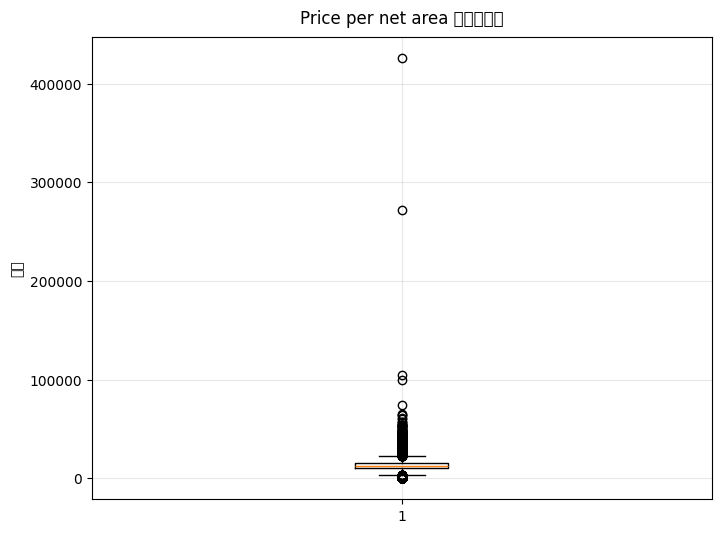

In [194]:
# ==================== 箱型图配置区 ====================
# 在这个列表中添加你想要绘制箱型图的列名
columns_to_plot = [
    'Price per net area',
    # 'Building Net Area',  # 取消注释来添加新的列
    # 'Building Price hkd',  # 取消注释来添加新的列
]
# ======================================================

# 数据预处理：将字符串类型的数值列转换为数字
def convert_to_numeric(series):
    """将包含逗号的字符串转换为数值"""
    if series.dtype == 'object':
        # 移除逗号并转换为数值
        return pd.to_numeric(series.str.replace(',', ''), errors='coerce')
    return series

# 为每个列绘制箱型图
num_plots = len(columns_to_plot)
if num_plots > 0:
    # 计算子图布局
    cols = min(2, num_plots)  # 每行最多2个图
    rows = (num_plots + cols - 1) // cols  # 计算需要的行数
    
    fig, axes = plt.subplots(rows, cols, figsize=(8*cols, 6*rows))
    
    # 如果只有一个图，将axes转换为数组方便统一处理
    if num_plots == 1:
        axes = [axes]
    else:
        axes = axes.flatten() if num_plots > 1 else [axes]
    
    for idx, col_name in enumerate(columns_to_plot):
        if col_name in df.columns:
            # 转换数据为数值类型
            # print("len(df[col_name])",len(df[col_name]))
            # 為什麼 len(df[col_name]) 會比 len(data)的樣本量大，因為有一些 亂碼 例如空格 星號被過濾了
            data = convert_to_numeric(df[col_name]).dropna()
            
            # 绘制箱型图
            axes[idx].boxplot(data)
            axes[idx].set_title(f'{col_name} 分布箱型图', fontsize=12, pad=10)
            axes[idx].set_ylabel('数值', fontsize=10)
            axes[idx].grid(True, alpha=0.3)
            
            # 显示统计信息
            print(f"\n{'='*60}")
            print(f"列名: {col_name}")
            print(f"{'='*60}")
            print(f"最大值: {data.max():,.2f}")
            print(data.max())
            print(f"最小值: {data.min():,.2f}")
            print(f"平均值: {data.mean():,.2f}")
            print(f"中位数: {data.median():,.2f}")
            print(f"数据量: {len(data):,}")
        else:
            axes[idx].text(0.5, 0.5, f'列 "{col_name}" 不存在', 
                          ha='center', va='center', fontsize=12)
            axes[idx].set_title(f'错误: {col_name}', fontsize=12)
    
    # 隐藏多余的子图
    for idx in range(num_plots, len(axes)):
        axes[idx].set_visible(False)
    
    # plt.tight_layout()
    plt.show()
else:
    print("请在 columns_to_plot 列表中添加要绘制的列名")



In [195]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 75414 entries, 13 to 1262495
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Building Location   75414 non-null  object
 1   Building Estate     75414 non-null  object
 2   District            75414 non-null  object
 3   Building Floor      75377 non-null  object
 4   Building Net Area   75414 non-null  object
 5   Building Price hkd  75414 non-null  int64 
 6   Price per net area  75414 non-null  object
 7   Transaction date    75414 non-null  object
dtypes: int64(1), object(7)
memory usage: 5.2+ MB
None


In [196]:
# ==================== 房屋类型分类与One-Hot Encoding ====================
# 基于 Price per net area 将房屋分为3个类别：经济型、标准型、豪华型

# 首先转换 Price per net area 为数值类型
price_numeric = convert_to_numeric(df['Price per net area'])

# 计算箱型图的统计值（用于分类）
data_for_stats = price_numeric.dropna()
Q1 = data_for_stats.quantile(0.25)
Q2 = data_for_stats.quantile(0.50)  # 中位数
Q3 = data_for_stats.quantile(0.75)
IQR = Q3 - Q1

# 箱型图的须端点
box_min = data_for_stats[data_for_stats >= (Q1 - 1.5 * IQR)].min()
box_max = data_for_stats[data_for_stats <= (Q3 + 1.5 * IQR)].max()

# 创建房屋类型分类函数（3个类别）
def classify_property_type(price):
    """
    根据价格将房屋分为3个类别：
    - Economy: 经济型房屋 (Level 0 & 1: < Q1)
    - Standard: 标准型房屋 (Level 2 & 3: Q1 到 Q3)
    - Premium: 豪华型房屋 (Level 4 & 5: >= Q3)
    - NaN: 无效数据
    """
    if pd.isna(price):
        return np.nan
    elif price < Q1:
        return 'Economy'
    elif price < Q3:
        return 'Standard'
    else:  # price >= Q3
        return 'Premium'

# 应用分类函数创建房屋类型列
df['Property_Type'] = price_numeric.apply(classify_property_type)

# 创建One-Hot Encoding
df['Property_Economy'] = (df['Property_Type'] == 'Economy').astype(int)
df['Property_Standard'] = (df['Property_Type'] == 'Standard').astype(int)
df['Property_Premium'] = (df['Property_Type'] == 'Premium').astype(int)

# 对于NaN值，所有One-Hot列都设为0
df.loc[df['Property_Type'].isna(), ['Property_Economy', 'Property_Standard', 'Property_Premium']] = 0

# 显示分类结果统计
print("="*80)
print("房屋类型分类完成！(Property Type Classification with One-Hot Encoding)")
print("="*80)
print(f"\n分类标准 (Classification Criteria):")
print(f"  Economy (经济型):   < {Q1:,.2f}  [原Level 0 & 1]")
print(f"  Standard (标准型):  [{Q1:,.2f}, {Q3:,.2f})  [原Level 2 & 3]")
print(f"  Premium (豪华型):   >= {Q3:,.2f}  [原Level 4 & 5]")

print(f"\n各类型样本数量 (Sample Count per Type):")
type_counts = df['Property_Type'].value_counts()
total_valid = type_counts.sum()
for ptype in ['Economy', 'Standard', 'Premium']:
    count = type_counts.get(ptype, 0)
    percentage = (count / total_valid * 100) if total_valid > 0 else 0
    print(f"  {ptype:10s}: {count:6,} 样本 ({percentage:5.2f}%)")

print(f"\n无效样本(NaN): {df['Property_Type'].isna().sum():,}")

print(f"\n新增列 (New Columns Added):")
print(f"  1. Property_Type (类别标签)")
print(f"  2. Property_Economy (One-Hot)")
print(f"  3. Property_Standard (One-Hot)")
print(f"  4. Property_Premium (One-Hot)")

print(f"\nOne-Hot Encoding 示例 (前5行):")
print(df[['Property_Type', 'Property_Economy', 'Property_Standard', 'Property_Premium']].head())

print(f"\n当前数据框形状: {df.shape}")
print("="*80)


房屋类型分类完成！(Property Type Classification with One-Hot Encoding)

分类标准 (Classification Criteria):
  Economy (经济型):   < 10,438.00  [原Level 0 & 1]
  Standard (标准型):  [10,438.00, 15,478.00)  [原Level 2 & 3]
  Premium (豪华型):   >= 15,478.00  [原Level 4 & 5]

各类型样本数量 (Sample Count per Type):
  Economy   : 13,526 样本 (24.98%)
  Standard  : 27,076 样本 (50.01%)
  Premium   : 13,536 样本 (25.00%)

无效样本(NaN): 21,276

新增列 (New Columns Added):
  1. Property_Type (类别标签)
  2. Property_Economy (One-Hot)
  3. Property_Standard (One-Hot)
  4. Property_Premium (One-Hot)

One-Hot Encoding 示例 (前5行):
    Property_Type  Property_Economy  Property_Standard  Property_Premium
13        Premium                 0                  0                 1
23        Premium                 0                  0                 1
25        Premium                 0                  0                 1
39        Premium                 0                  0                 1
145       Premium                 0                  0    

/var/folders/_1/w3rmdmrx14qdr85c4l_crhq80000gn/T/ipykernel_86763/3210914106.py:61: UserWarning: Glyph 32463 (\N{CJK UNIFIED IDEOGRAPH-7ECF}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/var/folders/_1/w3rmdmrx14qdr85c4l_crhq80000gn/T/ipykernel_86763/3210914106.py:61: UserWarning: Glyph 27982 (\N{CJK UNIFIED IDEOGRAPH-6D4E}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/var/folders/_1/w3rmdmrx14qdr85c4l_crhq80000gn/T/ipykernel_86763/3210914106.py:61: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/var/folders/_1/w3rmdmrx14qdr85c4l_crhq80000gn/T/ipykernel_86763/3210914106.py:61: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/var/folders/_1/w3rmdmrx14qdr85c4l_crhq80000gn/T/ipykernel_86763/3210914106.py:61: UserWarning: Glyph 20934 (\N{CJK UNIFIED IDEOGRAPH-51

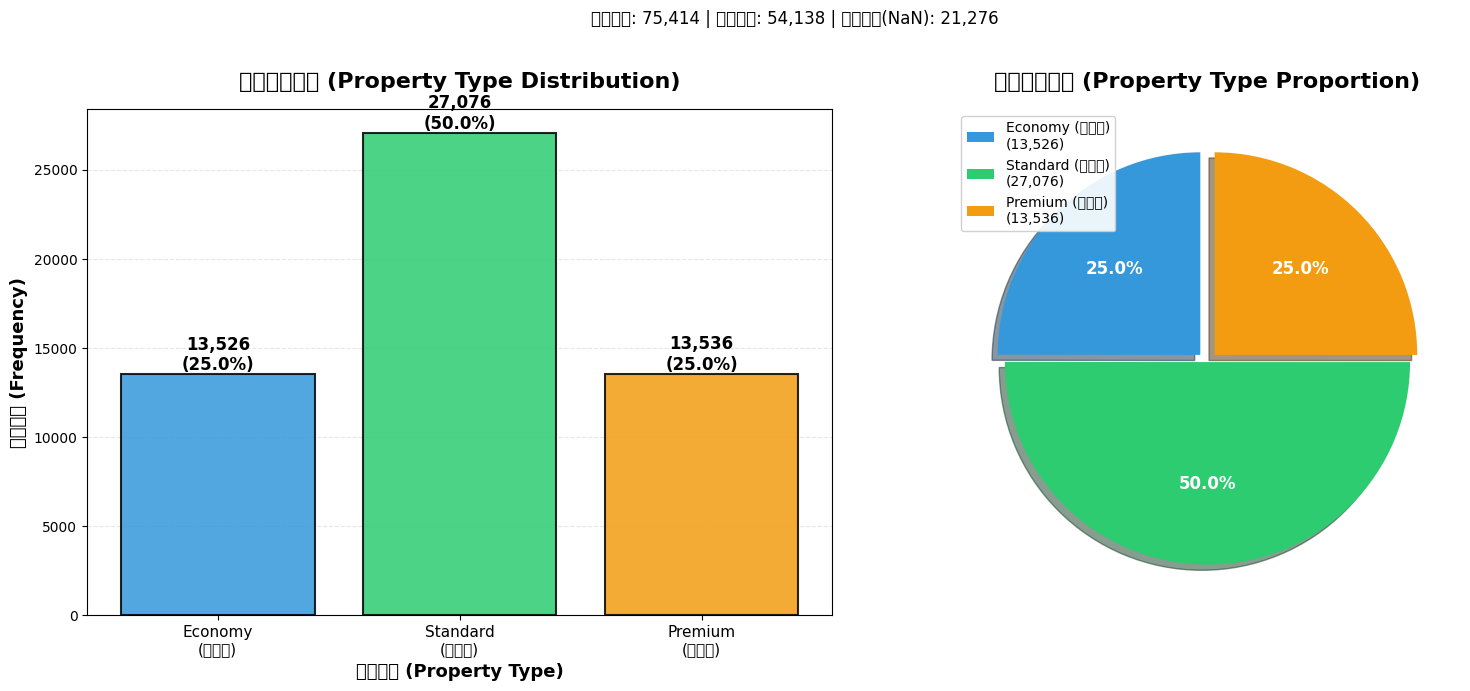


房屋类型分布与One-Hot Encoding统计

【类别分布】
  Economy (经济型)       : 13,526 样本 (24.98%)
  Standard (标准型)      : 27,076 样本 (50.01%)
  Premium (豪华型)       : 13,536 样本 (25.00%)

  有效样本总数: 54,138
  无效样本(NaN): 21,276
  总样本数:     75,414

【One-Hot Encoding 验证】
  Property_Economy 列求和:  13,526
  Property_Standard 列求和: 27,076
  Property_Premium 列求和:  13,536

【数据示例】
    Price per net area Property_Type  Property_Economy  Property_Standard  \
13              16,764       Premium                 0                  0   
23              19,398       Premium                 0                  0   
25              23,717       Premium                 0                  0   
39              22,973       Premium                 0                  0   
145             22,468       Premium                 0                  0   
165             23,895       Premium                 0                  0   
169             20,002       Premium                 0                  0   
220             22,319       Premium

In [197]:
# ==================== 可视化房屋类型分布 ====================
# 绘制柱状图显示3种房屋类型的频率分布

# 统计各类型的频率
type_counts = df['Property_Type'].value_counts()

# 按指定顺序排列
type_order = ['Economy', 'Standard', 'Premium']
type_counts_ordered = [type_counts.get(t, 0) for t in type_order]

# 创建柱状图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# === 左图：柱状图 ===
colors = ['#3498db', '#2ecc71', '#f39c12']  # 蓝色(经济)、绿色(标准)、金色(豪华)
bars = ax1.bar(type_order, type_counts_ordered, color=colors, 
               edgecolor='black', linewidth=1.5, alpha=0.85)

# 在柱子上添加数值标签
total_valid = sum(type_counts_ordered)
for i, (ptype, count) in enumerate(zip(type_order, type_counts_ordered)):
    percentage = (count / total_valid * 100) if total_valid > 0 else 0
    ax1.text(i, count, f'{count:,}\n({percentage:.1f}%)', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# 设置标题和标签
ax1.set_title('房屋类型分布 (Property Type Distribution)', fontsize=16, fontweight='bold', pad=15)
ax1.set_xlabel('房屋类型 (Property Type)', fontsize=13, fontweight='bold')
ax1.set_ylabel('样本数量 (Frequency)', fontsize=13, fontweight='bold')

# 设置x轴刻度标签
ax1.set_xticks(range(3))
ax1.set_xticklabels(['Economy\n(经济型)', 'Standard\n(标准型)', 'Premium\n(豪华型)'], fontsize=11)

# 添加网格线
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_axisbelow(True)

# === 右图：饼图 ===
colors_pie = ['#3498db', '#2ecc71', '#f39c12']
explode = (0.05, 0, 0.05)  # 突出显示经济型和豪华型

wedges, texts, autotexts = ax2.pie(type_counts_ordered, labels=None, colors=colors_pie,
                                     autopct='%1.1f%%', startangle=90, explode=explode,
                                     shadow=True, textprops={'fontsize': 12, 'fontweight': 'bold'})

# 设置百分比文字颜色为白色
for autotext in autotexts:
    autotext.set_color('white')

# 添加图例
legend_labels = [f'{t}\n({type_counts_ordered[i]:,})' for i, t in 
                 enumerate(['Economy (经济型)', 'Standard (标准型)', 'Premium (豪华型)'])]
ax2.legend(legend_labels, loc='upper left', fontsize=10, framealpha=0.9)
ax2.set_title('房屋类型占比 (Property Type Proportion)', fontsize=16, fontweight='bold', pad=15)

# 添加总体统计信息
fig.suptitle(f'总样本数: {len(df):,} | 有效样本: {total_valid:,} | 无效样本(NaN): {df["Property_Type"].isna().sum():,}',
             fontsize=12, y=0.98)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# === 打印One-Hot Encoding统计 ===
print("\n" + "="*80)
print("房屋类型分布与One-Hot Encoding统计")
print("="*80)

print("\n【类别分布】")
for i, ptype in enumerate(type_order):
    count = type_counts_ordered[i]
    percentage = (count / total_valid * 100) if total_valid > 0 else 0
    type_names = ['Economy (经济型)', 'Standard (标准型)', 'Premium (豪华型)']
    print(f"  {type_names[i]:20s}: {count:6,} 样本 ({percentage:5.2f}%)")

print(f"\n  有效样本总数: {total_valid:,}")
print(f"  无效样本(NaN): {df['Property_Type'].isna().sum():,}")
print(f"  总样本数:     {len(df):,}")

print("\n【One-Hot Encoding 验证】")
print(f"  Property_Economy 列求和:  {df['Property_Economy'].sum():,}")
print(f"  Property_Standard 列求和: {df['Property_Standard'].sum():,}")
print(f"  Property_Premium 列求和:  {df['Property_Premium'].sum():,}")

print("\n【数据示例】")
print(df[['Price per net area', 'Property_Type', 'Property_Economy', 
          'Property_Standard', 'Property_Premium']].head(10))

print("\n" + "="*80)


In [198]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 75414 entries, 13 to 1262495
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Building Location   75414 non-null  object
 1   Building Estate     75414 non-null  object
 2   District            75414 non-null  object
 3   Building Floor      75377 non-null  object
 4   Building Net Area   75414 non-null  object
 5   Building Price hkd  75414 non-null  int64 
 6   Price per net area  75414 non-null  object
 7   Transaction date    75414 non-null  object
 8   Property_Type       54138 non-null  object
 9   Property_Economy    75414 non-null  int64 
 10  Property_Standard   75414 non-null  int64 
 11  Property_Premium    75414 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 7.5+ MB
None


In [199]:
# ==================== District Target Encoding (使用平均房价) ====================
# 为 District 创建 Target Encoding，使用该区域的平均房价作为编码值

print("="*80)
print("District Target Encoding - 使用平均房价")
print("="*80)

# 计算每个区域的平均房价作为 target value
district_target_encoding = df.groupby('District')['Building Price hkd'].mean()

# 应用 target encoding 到 District 列
df['District_Target_Encoded'] = df['District'].map(district_target_encoding)

# 显示结果
print(f"\n✅ Target Encoding 完成!")
print(f"新列名: District_Target_Encoded")
print(f"编码方式: 使用该区域的平均房价 (Building Price hkd)")

print(f"\n各区域的 Target Encoding 值 (平均房价，前10个高价区域):")
print(district_target_encoding.sort_values(ascending=False).head(10))

print(f"\n各区域的 Target Encoding 值 (平均房价，前10个低价区域):")
print(district_target_encoding.sort_values(ascending=True).head(10))

print(f"\n当前数据框形状: {df.shape}")
print("="*80)


District Target Encoding - 使用平均房价

✅ Target Encoding 完成!
新列名: District_Target_Encoded
编码方式: 使用该区域的平均房价 (Building Price hkd)

各区域的 Target Encoding 值 (平均房价，前10个高价区域):
District
YTM    1522.537242
KLC     997.136531
WC      944.890244
ST      908.882507
SK      859.206509
TM      832.200930
ILD     832.107817
SSP     831.977894
EST     820.734692
WTS     813.382222
Name: Building Price hkd, dtype: float64

各区域的 Target Encoding 值 (平均房价，前10个低价区域):
District
NTH    461.362256
TW     526.535991
YL     684.082440
KC     694.981845
KT     710.592701
TP     790.200382
CW     796.313470
STH    801.466989
WTS    813.382222
EST    820.734692
Name: Building Price hkd, dtype: float64

当前数据框形状: (75414, 13)


In [ ]:

df = df.drop(columns=['District','Property_Type'])

print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 75414 entries, 13 to 1262495
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Building Location        75414 non-null  object 
 1   Building Estate          75414 non-null  object 
 2   Building Floor           75377 non-null  object 
 3   Building Net Area        75414 non-null  object 
 4   Building Price hkd       75414 non-null  int64  
 5   Price per net area       75414 non-null  object 
 6   Transaction date         75414 non-null  object 
 7   Property_Type            54138 non-null  object 
 8   Property_Economy         75414 non-null  int64  
 9   Property_Standard        75414 non-null  int64  
 10  Property_Premium         75414 non-null  int64  
 11  District_Target_Encoded  75414 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 7.5+ MB
None
